[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Saving twitter_training.csv to twitter_training.csv


<ipython-input-1-3533997297>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_df['Polarity'] = brand_df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-1-3533997297>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_df['Polarity_Label'] = brand_df['Polarity'].apply(
<ipython-input-1-3533997297>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

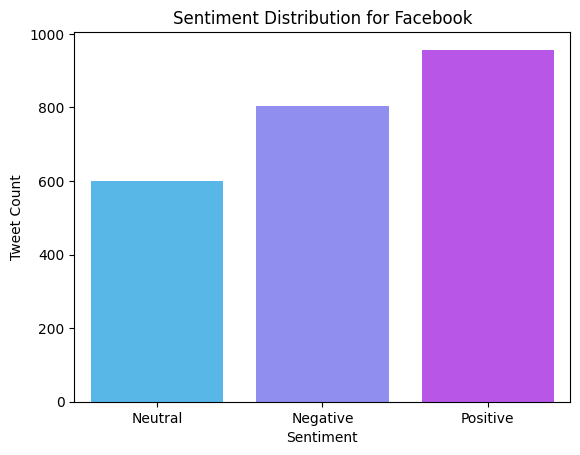

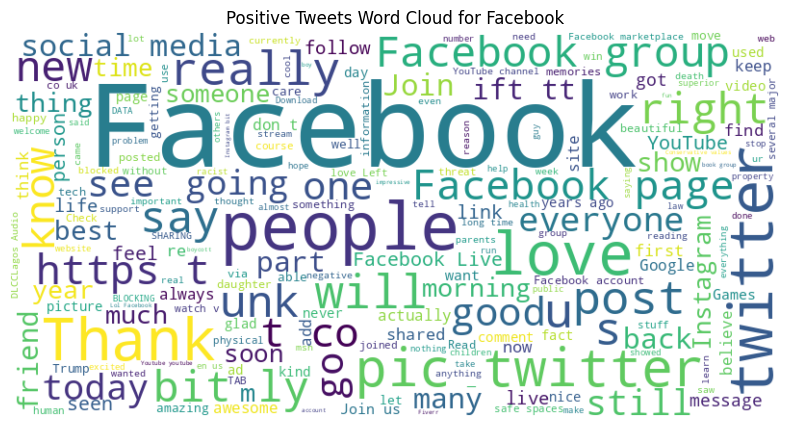

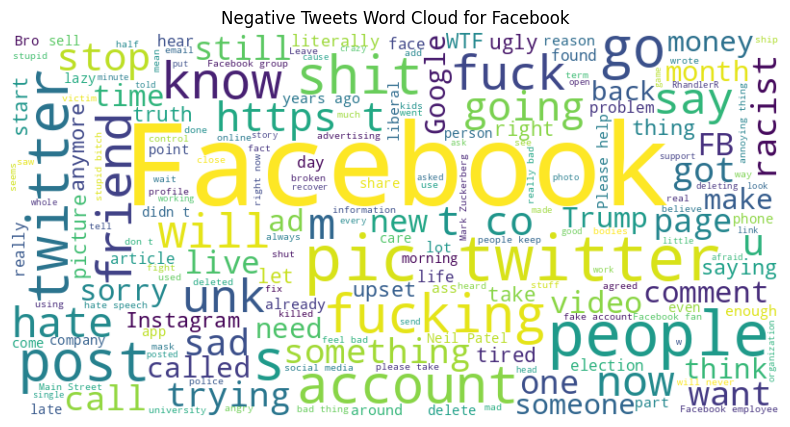

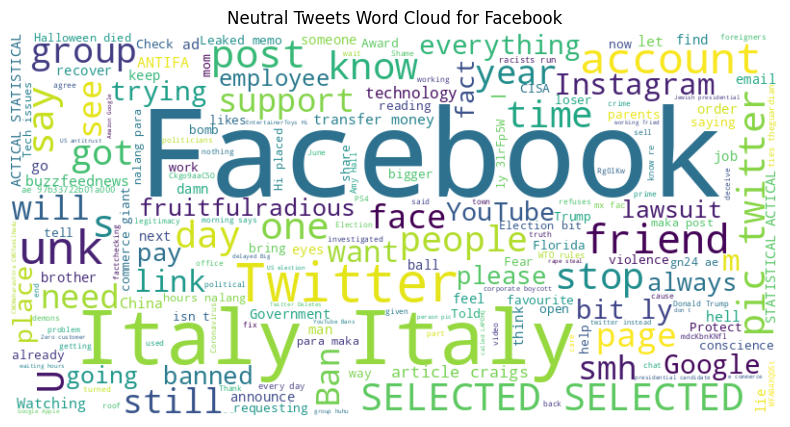

In [1]:

!pip install -q pandas numpy matplotlib seaborn nltk wordcloud textblob


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
from google.colab import files


nltk.download('punkt')


uploaded = files.upload()


column_names = ["ID", "Entity", "Sentiment", "Tweet"]
df = pd.read_csv("twitter_training.csv", names=column_names, header=None)


df.dropna(subset=["Tweet"], inplace=True)
df.head()

df['Polarity'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)


df['Polarity_Label'] = df['Polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)



df['Entity'].unique()

brand_name = "Facebook"
brand_df = df[df['Entity'] == brand_name]

brand_df.head()

brand_df['Polarity'] = brand_df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
brand_df['Polarity_Label'] = brand_df['Polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
sns.countplot(data=brand_df, x='Polarity_Label', palette='cool')
plt.title(f"Sentiment Distribution for {brand_name}")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

def generate_brand_wordcloud(sentiment):
    text = " ".join(tweet for tweet in brand_df[brand_df['Polarity_Label'] == sentiment]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{sentiment} Tweets Word Cloud for {brand_name}")
    plt.show()

generate_brand_wordcloud('Positive')
generate_brand_wordcloud('Negative')
generate_brand_wordcloud('Neutral')
